<a href="https://colab.research.google.com/github/rakesh4real/APACHE-KAFKA/blob/main/installation_and_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** Do **NOT** click `Run All` .Make sure you add addresses in config files as specified **every time** you run this notebook!

# Install Libraries

In [1]:
!pip install kafka-python

     |████████████████████████████████| 256kB 2.8MB/s 


In [2]:
from google.colab.output import serve_kernel_port_as_window as expose

# 1. Install Kafka and Zookeeper

Download `tgz` file and follow instructions [here](https://kafka.apache.org/quickstart)

In [3]:
!curl -O https://mirrors.estointernet.in/apache/kafka/2.6.0/kafka_2.13-2.6.0.tgz
!tar -xzf kafka_2.13-2.6.0.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62.5M  100 62.5M    0     0  2638k      0  0:00:24  0:00:24 --:--:-- 8562k


In [4]:
!ls kafka_2.13-2.6.0/config

connect-console-sink.properties    consumer.properties
connect-console-source.properties  log4j.properties
connect-distributed.properties	   producer.properties
connect-file-sink.properties	   server.properties
connect-file-source.properties	   tools-log4j.properties
connect-log4j.properties	   trogdor.conf
connect-mirror-maker.properties    zookeeper.properties
connect-standalone.properties


`server.properties` for all brokers' and ` zookeeper.properties` for management and sync

**`server.properties`:** (At correct location)

```
advertised.listeners=PLAINTEXT://localhost:9092
.
.
zookeeper.connect=localhost:2181
```

**Note:** Start Zookeeper first

In [5]:
!cd kafka_2.13-2.6.0 && bin/zookeeper-server-start.sh -daemon config/zookeeper.properties
!cd kafka_2.13-2.6.0 && JMX_PORT=8004 bin/kafka-server-start.sh -daemon config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


The two java processes correspond to zookeeper and the kafka instances.

In [6]:
!ps -ef | grep kafka

root         487       1 16 11:25 ?        00:00:01 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.13-2.6.0/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=102400 -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.13-2.6.0/bin/../logs -Dlog4j.configuration=file:bin/../config/log4j.properties -cp /content/kafka_2.13-2.6.0/bin/../libs/activation-1.1.1.jar:/content/kafka_2.13-2.6.0/bin/../libs/aopalliance-repackaged-2.5.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.13-2.6.0/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka_2.13-2.6.0/bin/../lib

# 2. Setup Kafka Manager

Make sure of java 8+ 

In [7]:
!java --version

openjdk 11.0.9 2020-10-20
OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)


In [8]:
!git clone https://github.com/yahoo/CMAK

Cloning into 'CMAK'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 6272 (delta 0), reused 0 (delta 0), pack-reused 6271
Receiving objects: 100% (6272/6272), 3.84 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (4060/4060), done.


Below command will create `target` folder upon successful compilation

In [ ]:
!cd CMAK && ./sbt clean dist 

In [ ]:
%cd CMAK/target/universal
!unzip cmak-3.0.0.5.zip
%cd cmak-3.0.0.5

In [11]:
!ls conf

application.conf  consumer.properties  logback.xml  logger.xml	routes


Add `<zookeerper-host-addr>:port` in `application.conf`:
```
#cmak.zkhosts="kafka-manager-zookeeper:2181"
cmak.zkhosts="localhost:2181"
```

In [12]:
expose(8081)

<IPython.core.display.Javascript object>

### **Click on the above link 👆 (will not load anything) and run the below 👇 cell. Refresh the page; You will see manager running!**

In [ ]:
"""
Launch manager
"""

!bin/cmak -Dconfig.file=conf/application.conf -Dhttp.port=8081 

2020-11-02 11:37:38,349 - [WARN] application - conf/application.conf: 12: play.crypto.secret is deprecated, use play.http.secret.key instead
2020-11-02 11:37:38,940 - [INFO] k.m.a.KafkaManagerActor - Starting curator...
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:zookeeper.version=3.5.7-f0fdd52973d373ffd9c86b81d99842dc2c7f660e, built on 02/10/2020 11:30 GMT
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:host.name=dec48e19bd3e
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:java.version=11.0.9
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:java.vendor=Ubuntu
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:java.home=/usr/lib/jvm/java-11-openjdk-amd64
2020-11-02 11:37:38,965 - [INFO] o.a.z.ZooKeeper - Client environment:java.class.path=/content/CMAK/target/universal/cmak-3.0.0.5/lib/../conf/:/content/CMAK/target/universal/cmak-3.0.0.5/lib/cmak.cmak-3.0.0.5-sans-externalized.

# Create new cluster

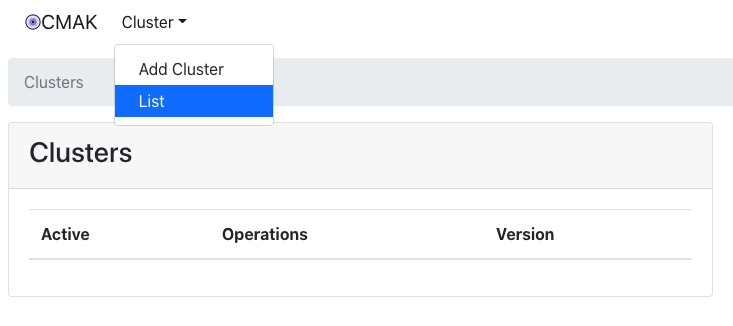

- **Cluster Name:** Give camelCased name. Eg, `TestCluster`
- **Cluster Zookeeper Hosts:** Coma separated addrs w/ ports (if multiple zookeepers) single address w/ port (if single zookeeper). Eg, `localhost:2181`
- [x] Enable JMX Polling (Set JMX_PORT env variable before starting kafka server)
- [x] Poll consumer information (Not recommended for large # of consumers if ZK is used for offsets tracking on older Kafka versions) -- To see how consumer is performing


**Leave others w/ default values** and click on `Save`

### ⭐️ To see the details about created clusters' `Brokers` (or) `Topics` click on the **number** adjacent to them

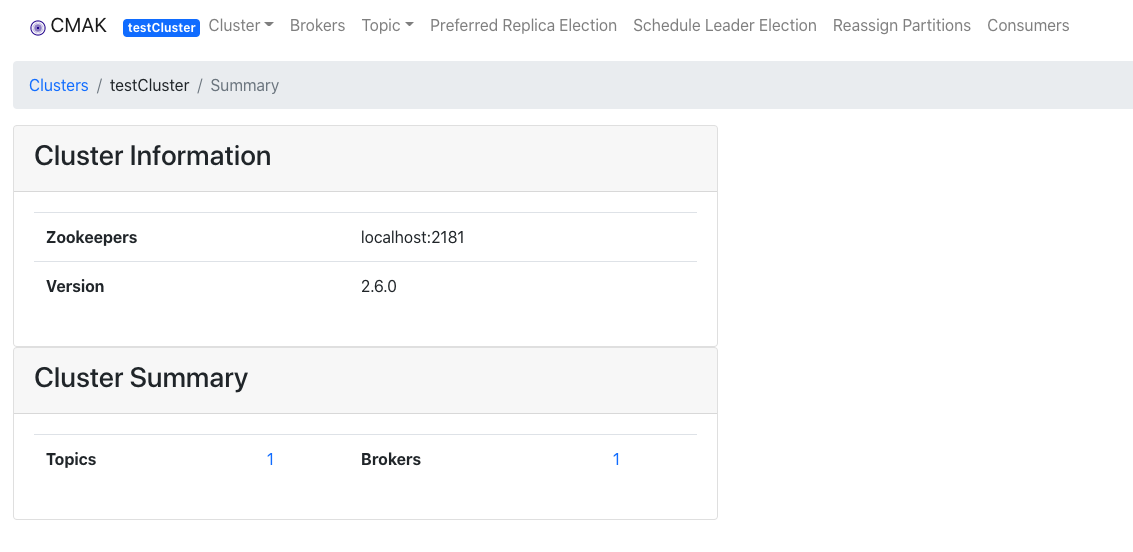

**Note:** You can Modify/Remove created clusters or add more clusters!


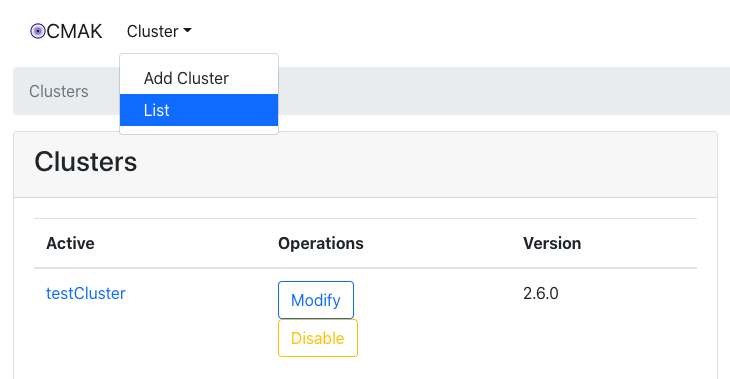